# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [85]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [86]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
data = pd.read_csv('train_house.csv', index_col=0)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [87]:
# Drop variabel NaN
data = data.dropna(axis=1)
data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [88]:
# Memisahkan data menjadi numerikal & kategorikal
num_cols = data._get_numeric_data().columns
data_numeric = data[num_cols]
data_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [89]:
data_categorical = data.drop(num_cols, axis = 1)
data_categorical

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

Text(0.5, 0, 'Utilities')

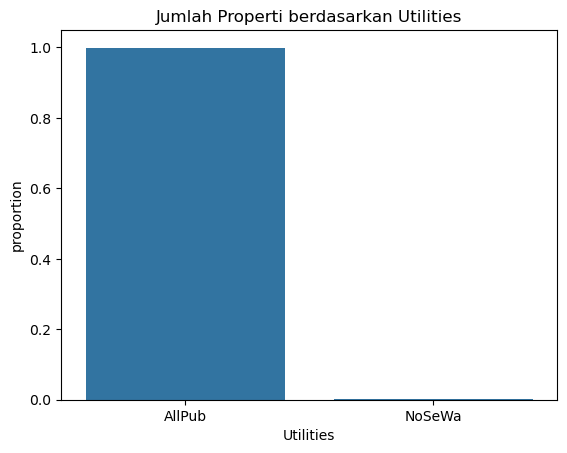

In [94]:
sns.barplot(x=data_categorical['Utilities'].value_counts().index,
                 y=data_categorical['Utilities'].value_counts(normalize = True))
plt.title('Jumlah Properti berdasarkan Utilities')
plt.xlabel('Utilities')

Text(0, 0.5, 'Jumlah Properti')

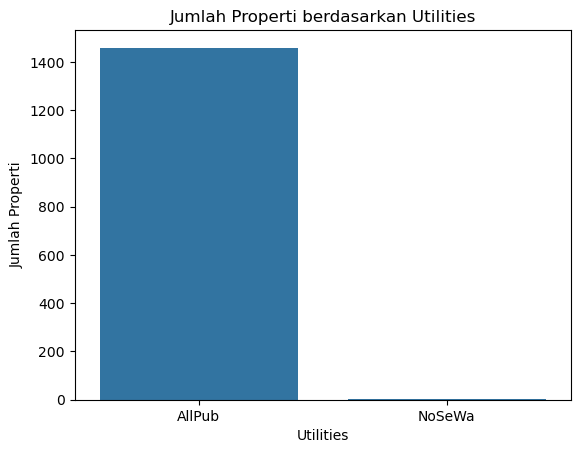

In [95]:
sns.countplot(x='Utilities', data=data_categorical)
plt.title('Jumlah Properti berdasarkan Utilities')
plt.xlabel('Utilities')
plt.ylabel('Jumlah Properti')

In [96]:
data_categorical['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

Text(0.5, 0, 'House Style')

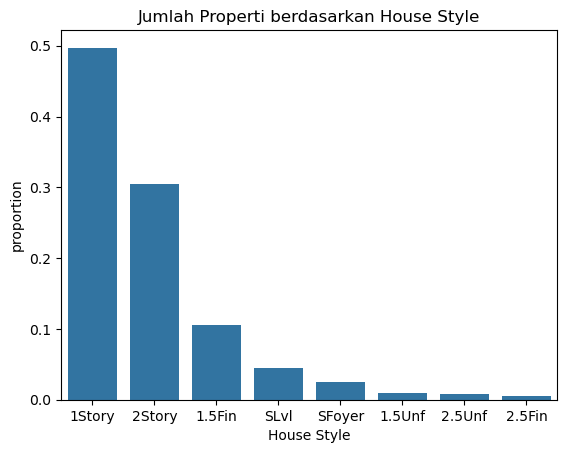

In [98]:
sns.barplot(x=data_categorical['HouseStyle'].value_counts().index,
                 y=data_categorical['HouseStyle'].value_counts(normalize = True))
plt.title('Jumlah Properti berdasarkan House Style')
plt.xlabel('House Style')

Text(0, 0.5, 'Jumlah Properti')

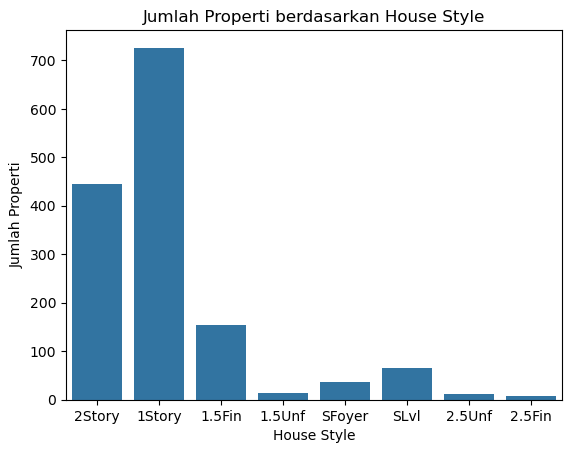

In [99]:
sns.countplot(x='HouseStyle', data=data_categorical)
plt.title('Jumlah Properti berdasarkan House Style')
plt.xlabel('House Style')
plt.ylabel('Jumlah Properti')

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

Text(0.5, 0, 'Exter Qual')

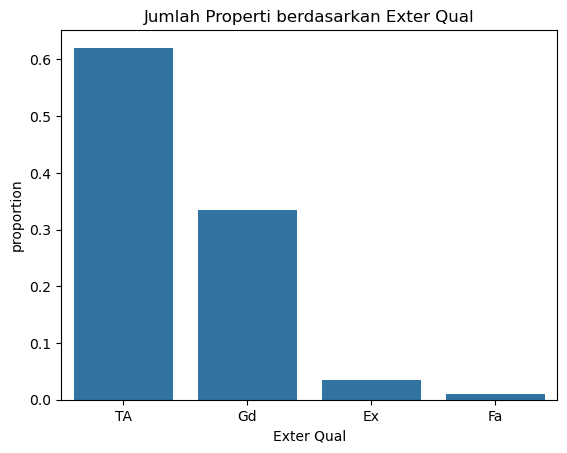

In [101]:
sns.barplot(x=data_categorical['ExterQual'].value_counts().index,
                 y=data_categorical['ExterQual'].value_counts(normalize = True))
plt.title('Jumlah Properti berdasarkan Exter Qual')
plt.xlabel('Exter Qual')

Text(0, 0.5, 'Jumlah Properti')

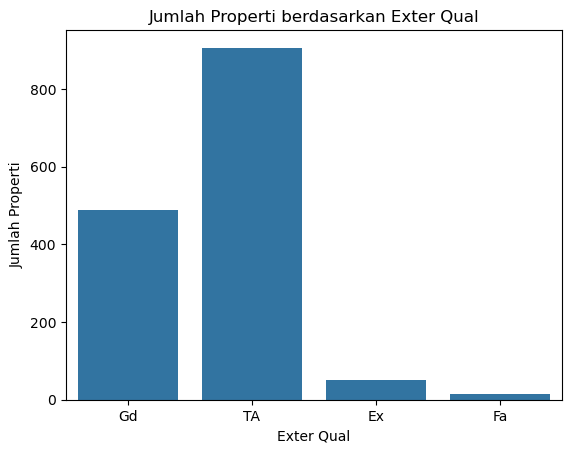

In [102]:
sns.countplot(x='ExterQual', data=data_categorical)
plt.title('Jumlah Properti berdasarkan Exter Qual')
plt.xlabel('Exter Qual')
plt.ylabel('Jumlah Properti')

#### **Analisis tentang variabel kategorikal**

* Berdasarkan visualisasi barplot di atas, dapat dilihat jenis-jenis properti yang lebih diminati pembeli
* Berdasarkan fasilitas yang tersedia, properti yang memiliki semua fasilitas umum (AllPub) jauh lebih diminati dengan hampir 100% properti yang dijual.
* Berdasarkan style propertinya, properti dengan 1 lantai lebih diminati dengan hampir 50% properti yang dijual lalu properti dengan 2 lantai sekitar 30% properti yang dijual
* Berdasarkan kualitas material eksteriornya, properti dengan material kualitas rata-rata jauh lebih diminati dengan lebih dari 60% properti yang dijual

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Median: 163000.0
Mean: 180921.19589041095
Std Dev: 79442.50288288663


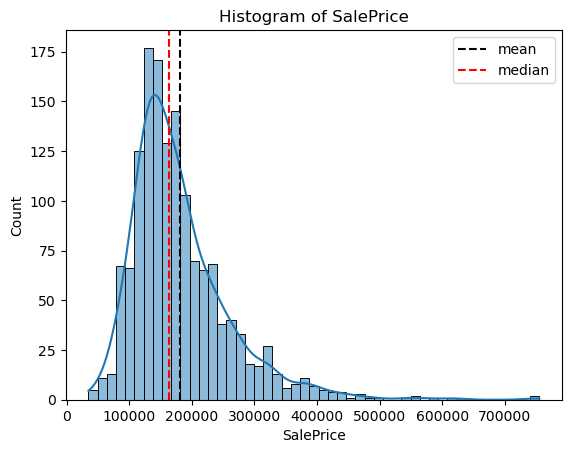

In [106]:
x = data_numeric["SalePrice"]
sns.histplot(x, kde=True)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title('Histogram of SalePrice')
plt.xlabel(x.name) 
plt.show()

#### **Analisis tentang variabel `SalePrice`**

* Terlihat data tidak terdistribusi normal melainkan right-skewed yang mana terlihat sebagian besar rumah yang terjual memiliki harga di rentang 100.000 sampai 250.000 lalu sebagian kecil rumah memiliki harga yang jauh lebih tinggi bahkan mencapai 700.000.
* Dari segi pasar hal ini menunjukkan rumah dengan harga lebih murah (100.000 sampai 250.000) paling sering terjual, rumah dengan harga jauh lebih mahal juga memiliki peminat namun cukup jarang..

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

Median: 1464.0
Mean: 1515.463698630137
Std Dev: 525.4803834232027


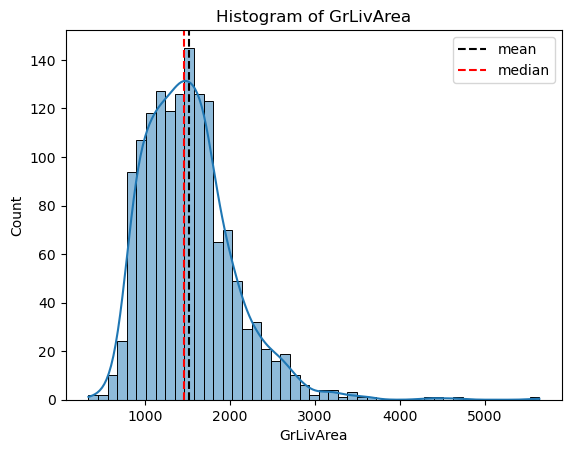

In [109]:
x = data_numeric["GrLivArea"]
sns.histplot(x, kde=True)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title('Histogram of GrLivArea')
plt.xlabel(x.name) 
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

* Terlihat data tidak terdistribusi normal melainkan right-skewed yang mana terlihat sebagian besar rumah yang terjual memiliki luas bangunan di rentang 1000 sampai 2000 lalu sebagian kecil rumah memiliki luas bangunan yang jauh lebih besar bahkan mencapai 5000.
* Hal ini mirip dengan distribusi harga rumah yang sudah ditampilkan sebelumnya, dari sini dapat disimpulkan mungkin harga rumah memiliki hubungan positif dengan luas bangunan. Artinya semakin besar luas bangunan maka harganya semakin mahal. Namun hal ini masih harus dianalisis lebih lanjut.
* 

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

Median: 480.0
Mean: 472.9801369863014
Std Dev: 213.80484145338076


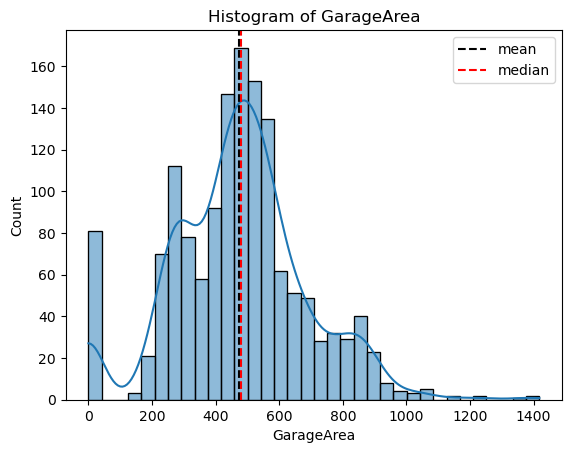

In [112]:
x = data_numeric["GarageArea"]
sns.histplot(x, kde=True)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title('Histogram of GarageArea')
plt.xlabel(x.name) 
plt.show()

#### **Analisis tentang variabel `GarageArea`**

* Terlihat data juga tidak terdistribusi normal, namun disini terdapat hal menarik karena sebagian data bernilai 0 yang artinya tidak memiliki garasi. dari grafik dapat dilihat jika sekitar 80 rumah tidak memiliki area garasi.
* Untuk analisis lebih lanjut, akan dihapus data rumah yang tidak memiliki garasi sehingga dapat dilihat distribusi data dari rumah-rumah yang memiliki garasi

In [114]:
print('number of nonzero values:',np.sum(data_numeric['GarageArea'] != 0))
print('number of zero values:',np.sum(data_numeric['GarageArea'] == 0))

number of nonzero values: 1379
number of zero values: 81


Median: 484.0
Mean: 500.76214648295866
Std Dev: 185.68051979433156


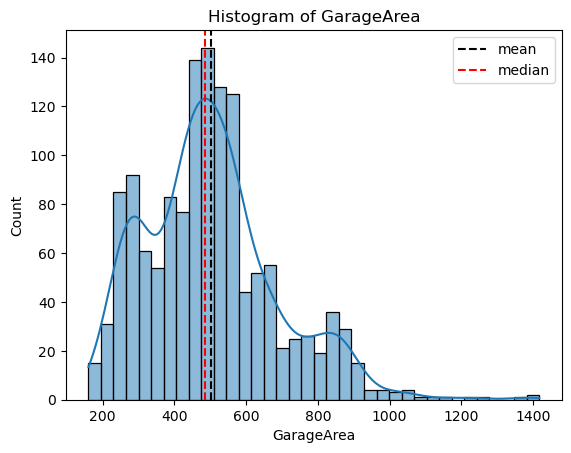

In [115]:
x = data_numeric["GarageArea"] [data_numeric['GarageArea'] != 0]
sns.histplot(x, kde=True)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title('Histogram of GarageArea')
plt.xlabel(x.name) 
plt.show()

## Pemrosesan Data Variabel Numerikal

Median: 5.212187604403958
Mean: 5.221978956475628
Std Dev: 0.17347974217176843


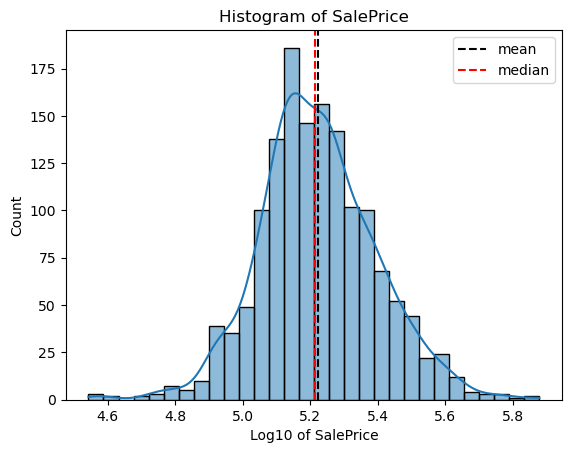

In [117]:
# Transformasi log-10 SalePrice

x = np.log10(data_numeric["SalePrice"])
sns.histplot(x, bins=30, kde=True)  
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
plt.legend(handles=[line1, line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title('Histogram of SalePrice')
plt.xlabel("Log10 of SalePrice") 
plt.show()

Median: 3.165541076722373
Mean: 3.156354310389778
Std Dev: 0.14485910869663873


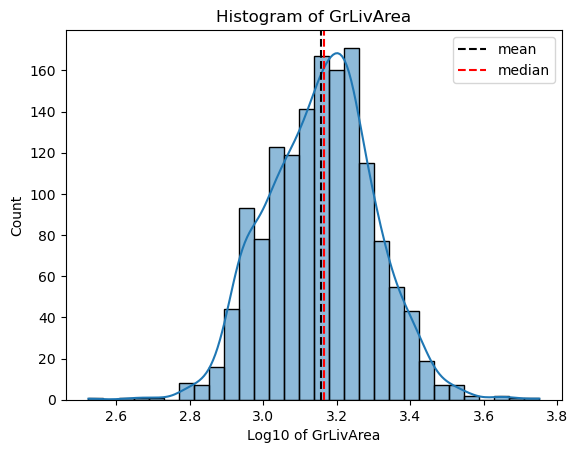

In [118]:
# Transformasi log-10 GrLivArea

x = np.log10(data_numeric["GrLivArea"])
sns.histplot(x, bins=30, kde=True)  
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
plt.legend(handles=[line1, line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title('Histogram of GrLivArea')
plt.xlabel("Log10 of GrLivArea") 
plt.show()

Median: 2.6848453616444123
Mean: 2.6696154158200915
Std Dev: 0.16427840573730204


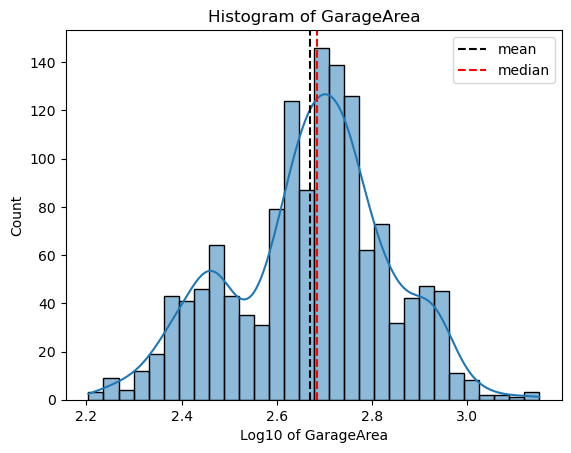

In [119]:
# Menghilangkan nilai nol pada GarageArea

x = np.log10(data_numeric["GarageArea"][data_numeric['GarageArea'] != 0])
sns.histplot(x, bins=30, kde=True)  
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
plt.legend(handles=[line1, line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title('Histogram of GarageArea')
plt.xlabel("Log10 of GarageArea") 
plt.show()

#### **Penjelasan dan analisis tentang pemrosesan data**

* Setelah menerapkan transformasi logaritmik (log10), distribusi data terlihat lebih simetris atau mendekati distribusi normal. Sebelumnya terdapat outliers yang membuat distribusi data menjadi miring, transformasi logaritmik terlihat mampu mengurangi efek dari nilai ekstrim sehingga data lebih terkonsentrasi di dekat nilai mean dan mediannya.

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

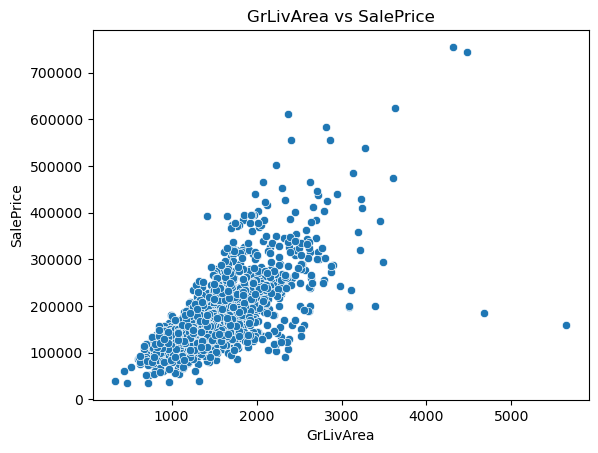

In [124]:
ax = sns.scatterplot(y="SalePrice", x="GrLivArea", data=data_numeric)
plt.title('GrLivArea vs SalePrice')
plt.xlabel("GrLivArea") 
plt.ylabel("SalePrice") 
plt.show()

# `GarageArea` dengan `SalePrice`

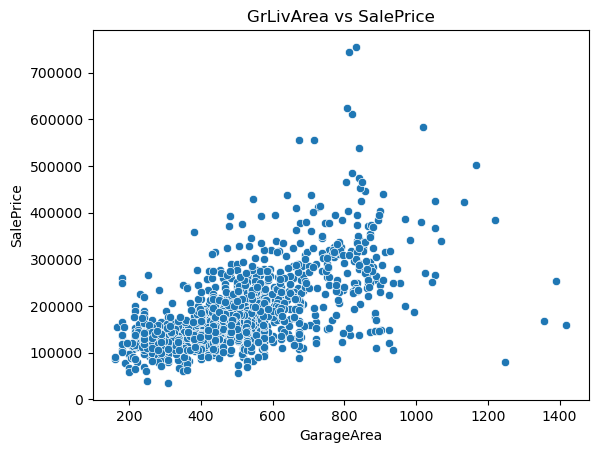

In [126]:
ax = sns.scatterplot(y=data_numeric["SalePrice"], x=data_numeric["GarageArea"][data_numeric['GarageArea'] != 0])
plt.title('GrLivArea vs SalePrice')
plt.xlabel("GarageArea") 
plt.ylabel("SalePrice")
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

* Terlihat ada pola korelasi positif antara luas bangunan dan harga rumah. Artinya, semakin luas suatu bangunan maka semakin tinggi harganya. Namun ada beberapa outlier di sebelah kanan grafik yang menunjukkan bangunan dengan luas yang besar namun harganya tidak terlalu tinggi. Hal Ini bisa dianalisis lebih lanjut penyebabnya, apakah disebabkan oleh kondisi bangunan, lokasi, atau fitur rumah yang mungkin tidak sesuai dengan ukuran besar tersebut.
* Terlihat ada pola korelasi positif juga antara luas garasi dan harga rumah. Sama seperti sebelumnya, hal ini menunjukkan semakin besar luas garasi maka harga rumahnya akan semakin mahal. Namun juga terlihat adanya outlier di sebelah kanan dan atas grafik yang menunjukkan rumah dengan garasi yang sangat luas namun harganya tidak terlalu mahal dan ada pula rumah dengan garasi tidak terlalu luas namun harganya sangat tinggi. Hal Ini bisa dianalisis lebih lanjut penyebabnya, apakah disebabkan oleh kondisi bangunan, lokasi, atau fitur rumah yang mungkin tidak sesuai dengan ukuran besar tersebut.